In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def RN_generator_sum(var):
    RN = 0
    for _ in range(var):
        RN += np.random.rand()
    return RN

def RN_generator_mul(var):
    RN = 1
    for _ in range(var):
        RN *= np.random.rand()
    return RN

def Norm_distribution(mean, std, x):
    return (1/(std * np.sqrt(2*np.pi))) * np.exp(-0.5 * ((x - mean) / std)**2)

def LogNorm_distribution(mean, std, x):
    return (1/(x*std * np.sqrt(2*np.pi))) * np.exp(-0.5 * ((np.log(x) - mean) / std)**2)

In [5]:
n = 10**8
rn_sum = np.zeros((n, 4))

for _ in range(n):
    rn_sum[_][0] = RN_generator_sum(1)
    rn_sum[_][1] = RN_generator_sum(2)
    rn_sum[_][2] = RN_generator_sum(3)
    rn_sum[_][3] = RN_generator_sum(10)
    
rn_mul = np.zeros((n, 4))

for _ in range(n):
    rn_mul[_][0] = RN_generator_mul(1)
    rn_mul[_][1] = RN_generator_mul(2)
    rn_mul[_][2] = RN_generator_mul(3)
    rn_mul[_][3] = RN_generator_mul(10)
    
mean_std = np.zeros((8, 2))

for i in range(4):
    mean_std[i][0] = np.mean(rn_sum[:, i])
    mean_std[i][1] = np.std(rn_sum[:, i])
    
    tmp = np.log(rn_mul[:, i][rn_mul[:, i] > 0])
    mean_std[i+4][0] = np.mean(tmp)
    mean_std[i+4][1] = np.std(tmp)


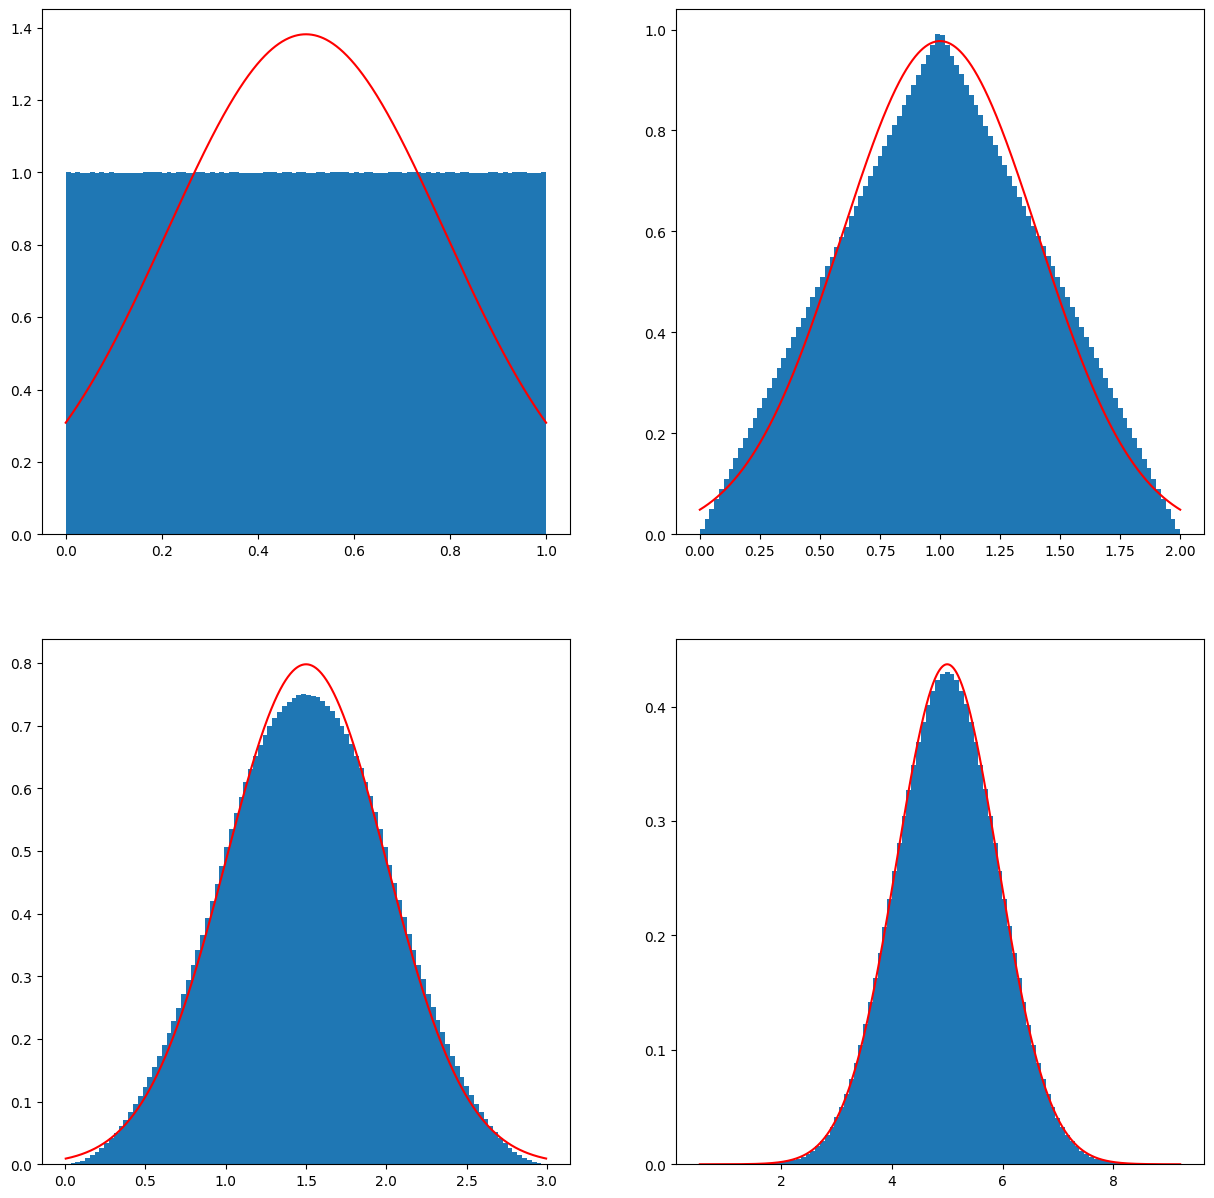

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
val_y = np.zeros((4, 1000))
MSE_sum = []
for i in range(4):
    val_hist, bins, _ = axes[i//2][i%2].hist(rn_sum[:, i], bins=100, density=True)

    center = (bins[:-1] + bins[1:]) / 2
    norm = Norm_distribution(mean_std[i][0], mean_std[i][1], center)
    MSE = np.mean((val_hist - norm)**2)
    MSE_sum.append(MSE)

    val_x = np.linspace(np.min(rn_sum[:, i]), np.max(rn_sum[:, i]), 1000)
    val_y[i] = Norm_distribution(mean_std[i][0], mean_std[i][1], val_x)
    
    axes[i//2][i%2].plot(val_x, val_y[i], color='red')

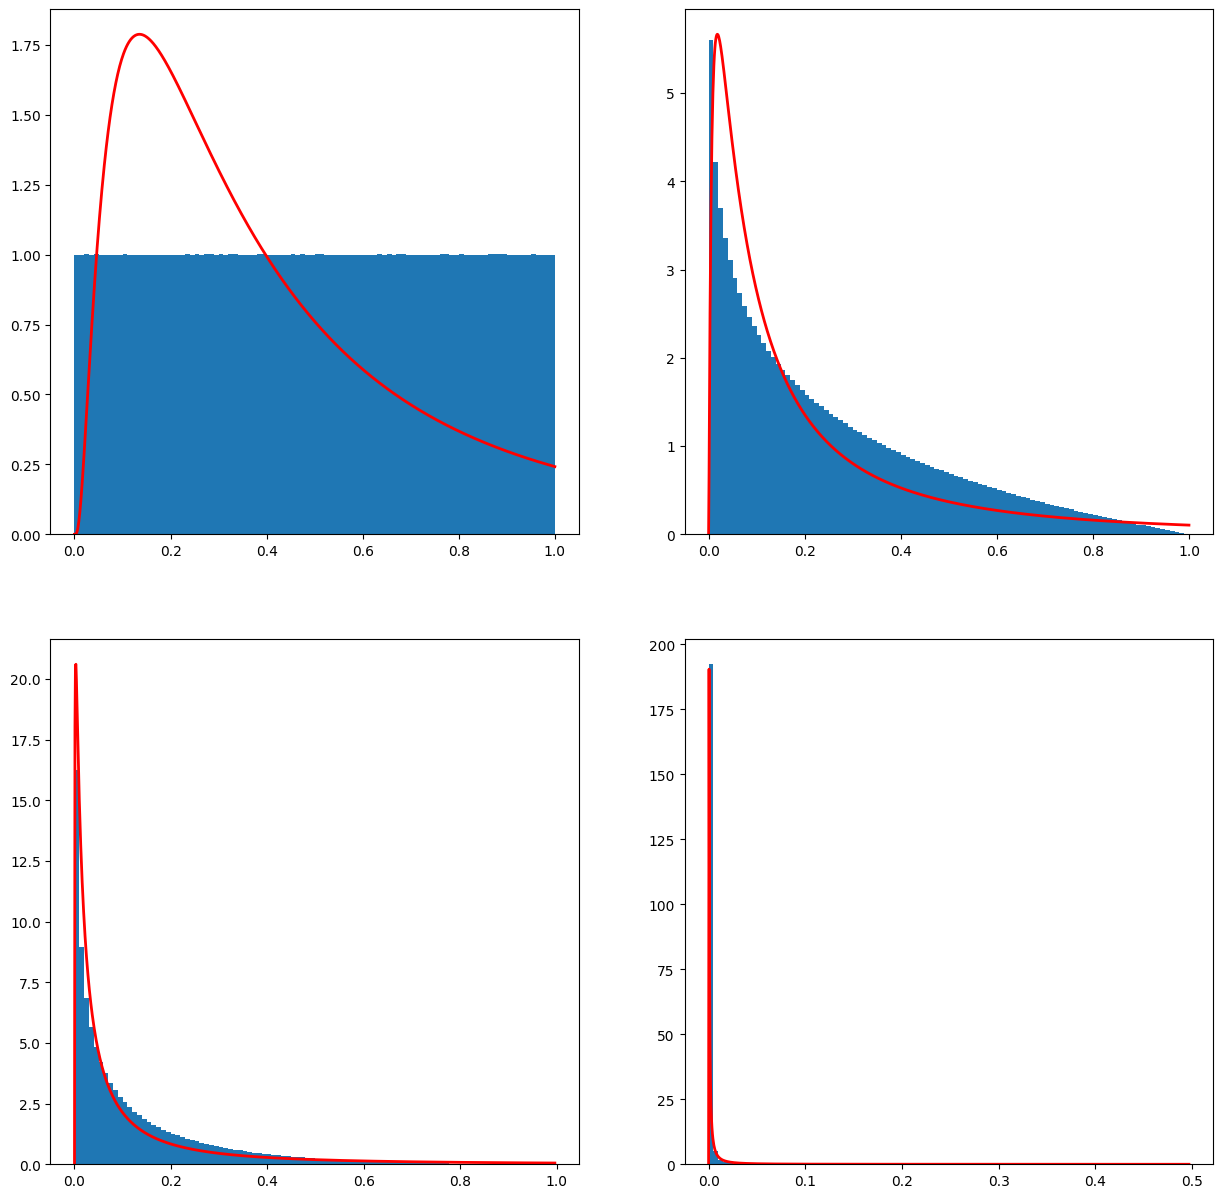

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
val_y2 = np.zeros((4, 1000))
MSE_mul = []
for i in range(4):
    axes[i//2][i%2].hist(rn_mul[:, i], bins=100, density=True)
    
    center = (bins[:-1] + bins[1:]) / 2
    norm = LogNorm_distribution(mean_std[i][0], mean_std[i][1], center)
    MSE = np.mean((val_hist - norm)**2)
    MSE_mul.append(MSE)
    
    val_x2 = np.linspace(np.min(rn_mul[:, i][rn_mul[:, i] > 0]),
                         np.max(rn_mul[:, i]), 1000)
    val_y2[i] = LogNorm_distribution(mean_std[i+4][0], mean_std[i+4][1], val_x2)
    axes[i//2][i%2].plot(val_x2, val_y2[i], color='red', linewidth=2)

In [8]:
print("MSE of Normal distributions: \n", MSE_sum[:2], "\n", MSE_sum[2:4])
print("MSE of LogNormal distributions: \n", MSE_mul[:2], "\n",MSE_mul[2:4])

MSE of Normal distributions: 
 [np.float64(0.12972166437206073), np.float64(0.0024659858393331654)] 
 [np.float64(0.00042507275787958724), np.float64(6.429599727848824e-06)]
MSE of LogNormal distributions: 
 [np.float64(0.10426659555818722), np.float64(0.04624255609717934)] 
 [np.float64(0.015465683905432157), np.float64(0.03532747654329995)]
